<a href="https://colab.research.google.com/github/Learner890/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Hotel_bk_df=pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv') #Loading Data Set

**1. Getting basic information about data set.**

In [4]:
Hotel_bk_df.head(5) # Top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
Hotel_bk_df.tail(5) #Last 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
Hotel_bk_df.info() #Finding data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
Hotel_bk_df.shape #Finding rows and columns

(119390, 32)

In [8]:
Hotel_bk_df.columns # List of columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
Hotel_bk_df.isnull().sum() #Finding columns having null value

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
Hotel_bk_df.isnull().any() # Columns with missing values

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [11]:
Hotel_bk_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
Hotel_bk_df_1=Hotel_bk_df.copy() #Making a copy so that original datset doesn't get affected

**2. Handling Missing Values**

In [13]:
Hotel_bk_df_1.loc[:5,['children','country','agent']]

,children,country,agent
0,0.0,PRT,NaN
1,0.0,PRT,NaN
2,0.0,GBR,NaN
3,0.0,GBR,304.0
4,0.0,GBR,240.0
5,0.0,GBR,240.0


2.1 Children column's missing value is filled with the mode because of the 
small number of missing values.
2.2 Country's missing value will be filled with NULL because it is of object data type.
2.3 Agent's column missing value will be filled with 0 because it's of float data type.
2.4 Company column will be remove because it has 112593 missing rows with missing rate 94.3% which is greater than the standard 80% missing rows.

In [14]:
Hotel_bk_df_1.children.fillna(Hotel_bk_df_1.children.mode()[0],inplace=True)
Hotel_bk_df_1.country.fillna('NULL',inplace=True)
Hotel_bk_df_1.agent.fillna(0, inplace=True)
Hotel_bk_df_1.drop('company',inplace=True, axis=1) # Since the Company column has 112593 missing values which the missing rate 
#is 94.3% which is  greater than standard 80% so we are removing this column.

In [15]:
Hotel_bk_df_1.isnull().sum() #Recheking column with Null Values.

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [16]:
Hotel_bk_df_1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


**3. Data Cleansing**

3.1 Children,Agent column can't be of float type we will have to make it integer.

In [17]:
Hotel_bk_df_1.children=Hotel_bk_df_1.children.astype(int)
Hotel_bk_df_1.agent=Hotel_bk_df_1.agent.astype(int)

3.2 Meal Coulmn has value as Undefined we will replace it with SC.

In [18]:
Hotel_bk_df_1.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [19]:
Hotel_bk_df_1.replace('Undefined','SC',inplace=True)

3.3 Occupancy is 0 as per data below there are few rows where occupancy of guest is 0. We will have to drop those indexes.

In [20]:
Hotel_bk_df_1.loc[(Hotel_bk_df_1['adults']==0) & (Hotel_bk_df_1['children']==0) & (Hotel_bk_df_1['babies']==0)][:5]
#Occupancy is 0
zero_occupancy=Hotel_bk_df_1[Hotel_bk_df_1[['adults','children','babies']].sum(axis=1)==0]
Hotel_bk_df_1.drop(zero_occupancy.index,inplace=True)
Hotel_bk_df_1.loc[(Hotel_bk_df_1['adults']==0) & (Hotel_bk_df_1['children']==0) & (Hotel_bk_df_1['babies']==0)][:5] #Zero Occupancy removed.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


3.4 Number of days of stay is 0 which need to be removed.

In [28]:
Hotel_bk_df_1.loc[(Hotel_bk_df_1['stays_in_weekend_nights']==0) & (Hotel_bk_df_1['stays_in_week_nights']==0)][:5]
#Number of days of stay is 0.
zero_days=Hotel_bk_df_1[Hotel_bk_df_1[['stays_in_weekend_nights','stays_in_week_nights']].sum(axis=1)==0]
Hotel_bk_df_1.drop(zero_days.index,inplace=True)
Hotel_bk_df_1.loc[(Hotel_bk_df_1['stays_in_weekend_nights']==0) & (Hotel_bk_df_1['stays_in_week_nights']==0)][:5] # Days having 0 stay is removed.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**4. We don't have any null columns so we can start data visualization.**

In [30]:
Hotel_bk_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

4.1 Data Visualization starts from here.

In [32]:
Hotel_bk_df_1.head(5) #Finding top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03


4.2 Finding number of numerical data type with it's values using histogram.

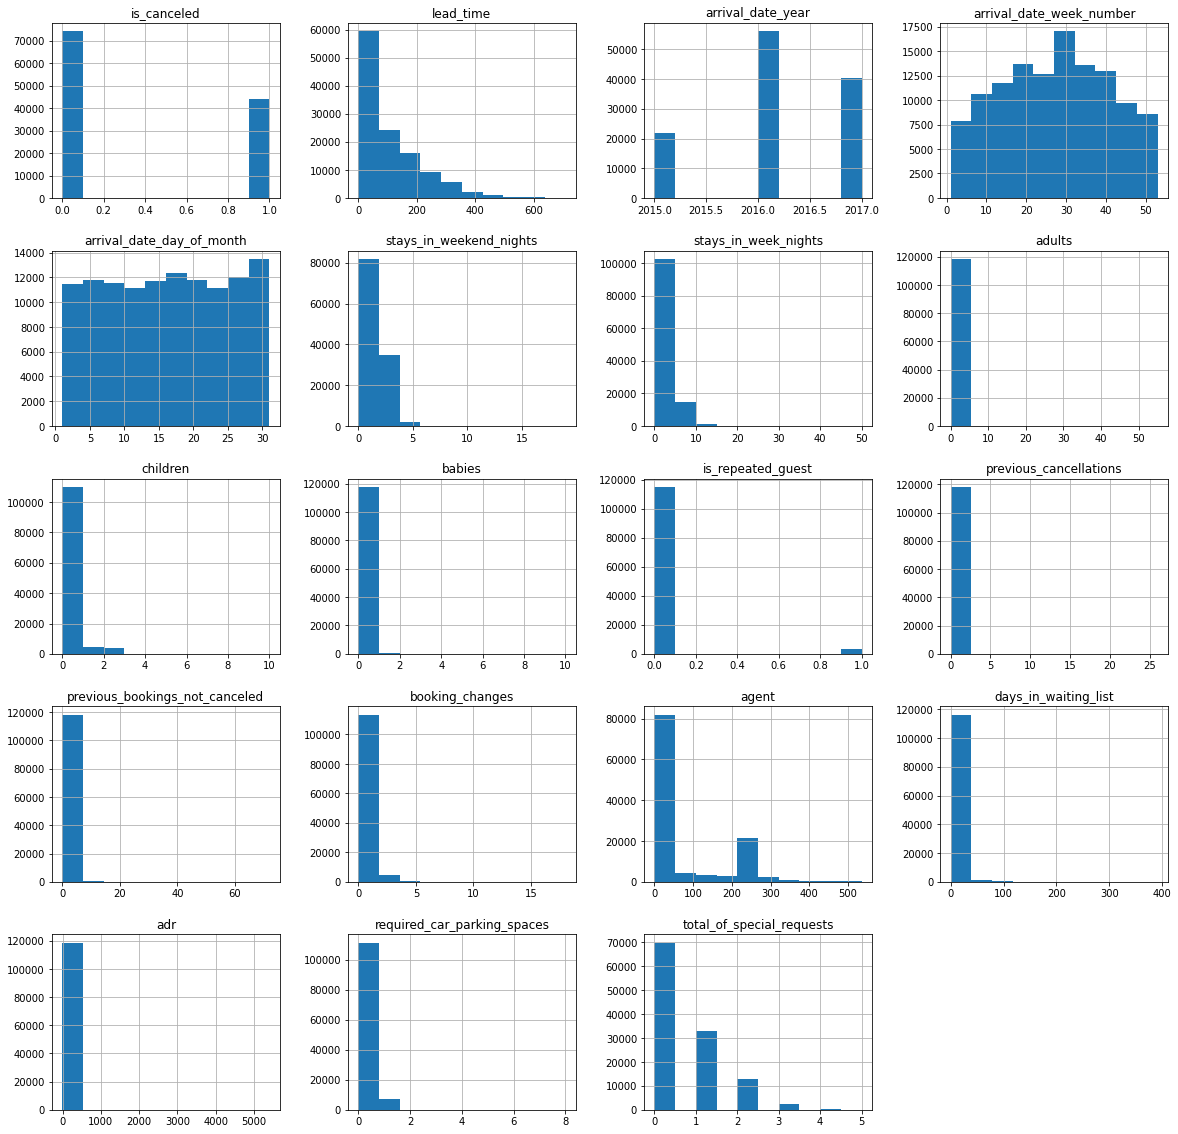

(None,)

In [33]:
Hotel_bk_df_1.hist(figsize=(20,20))
plt.show(),

4.3 Finding Hotel type and their cancellation.

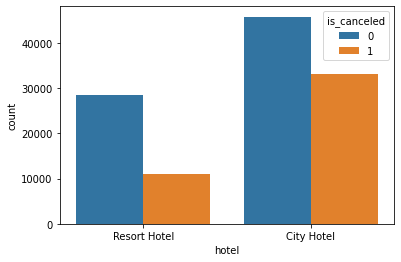

In [35]:
sns.countplot(x=Hotel_bk_df_1['hotel'],hue=Hotel_bk_df_1['is_canceled'])

Analysis :The order of city hotel is much higher than resort hotel but at the same time the chances of cancellation at city hotel is also much higher than resort hotel. We will have to find the reason behind this

4.4 Finding the relationship between room type and cancellation.

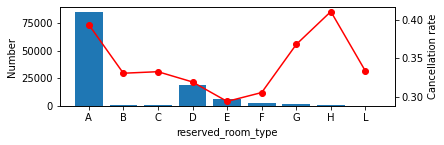

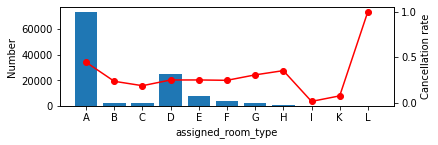

In [38]:
index=1
for room_type in ['reserved_room_type', 'assigned_room_type']:
  ax1=plt.subplot(2,1,index)
  index+=1
  ax2=ax1.twinx()  #The Axes.twinx() function in axes module of matplotlib library is used to create a twin Axes sharing the xaxis.
  ax1.bar(
      Hotel_bk_df_1.groupby(room_type).size().index,     # x= hotel_booking_df_1.groupby(room_type).size().index
      Hotel_bk_df_1.groupby(room_type).size())           #y=hotel_booking_df_1.groupby(room_type).size()
  ax1.set_xlabel(room_type)
  ax1.set_ylabel('Number')


  ax2.plot(Hotel_bk_df_1.groupby(room_type)['is_canceled'].mean(),'ro-')
  ax2.set_ylabel('Cancellation rate')
  plt.show()

Analysis : Most of the room types of reserved and assigned are mainly concentrated in A/D/E/F region. Out of which A region has maximum cancellation so that should be looked.